# Supervised learning

- It's used when we want to predict an outcome from a given input, and we have examples of input–output pairs.
- Two main types: classification and regression.
- Classification: For a given input, predict class label from a set of possible labels.
    - binary classification (Email: spam or non-spam)
    - multi-class classification (Iris flower classification: setosa, virginica, versicolor)
- Regression: For a given input, predict a real number (given its size, predict a house's price)

## *k*-NN classifier

- Consider $k$ neighbors of a test data point. 
- If $k>1$, use voting to assign a label. 
- Figure: Guido&mueller, p. 36, showing the example for $k=3$.

**Model complexity for $k$NN model**

- When $k$ small
  - The model makes predictions based on the nearest individual training data point. 
  - This leads to a very fine-grained decision boundary that can adapt closely to the training data, even capturing noise.
  - Each training point essentially has its own "influence zone," making the model highly flexible but prone to overfitting.

- When $k$ is large:
  - The model averages the influence of multiple neighbors to make predictions.
  - This results in a **smoother decision boundary** that is less sensitive to individual points, making the model more **generalized** and less prone to overfitting.


![alt text](images/threeNN.png)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-talk")
plt.rcParams['figure.dpi'] = 75


In [23]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

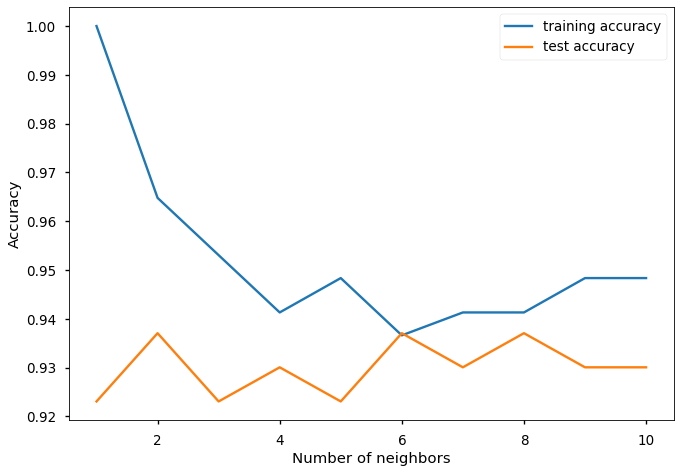

In [24]:
# code from Guido & Mueller

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=30
)

# For the breast cancer dataset: cancer.target contains binary values (0 for malignant and 1 for benign). Suppose 62% of the samples are benign and 38% are malignant. Using `stratify=cancer.target` ensures that both the training and test sets maintain this same proportion of benign and malignant samples.

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
pass;
# note that this plot is a horizontally flipped version of the generalization error plot in 03-notebook.ipynb

## *k*NN regression

- Unlike *k*NN classification, where the output is a class label, *k*NN regression predicts a numerical value based on the average (or sometimes weighted average) of the target values of the $k$ nearest neighbors.

1. Choose the Number of Neighbors $k$
2. Find its $k$-nearest Neighbors (Eucledian distance is often used)
3. Compute the Predicted Value by taking the mean of the target values of the $k$-nearest neighbors.

- Simple
- **Non-parametric**: No assumptions about the underlying data distribution. Important!
- Works well with both linear and non-linear relationships.
- Computationally expensive

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^k y_i
$$

Another possibility: take weighted average where closer neighbors having more influence
$$
\hat{y} = \frac{\sum_{i=1}^k w_i y_i}{\sum_{i=1}^k w_i}, \quad w_i = \frac{1}{\text{distance to neighbor}_i}
$$


![](images/threeNNregression.png)



Mean-squared error ([Scikit documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error))

$$
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
$$

$R^2$ score (**coefficient of determination**)

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Where:

Residual Sum of Squares

$$
  \text{SS}_{\text{res}} = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$$

$y_i$: Actual value, $\hat{y}_i$: Predicted value

Total Sum of Squares

$$
  \text{SS}_{\text{tot}} = \sum_{i=1}^{n} \left( y_i - \bar{y} \right)^2
$$

Mean Squared Error: 5.854038551615032
R-squared: 0.9903039677369723


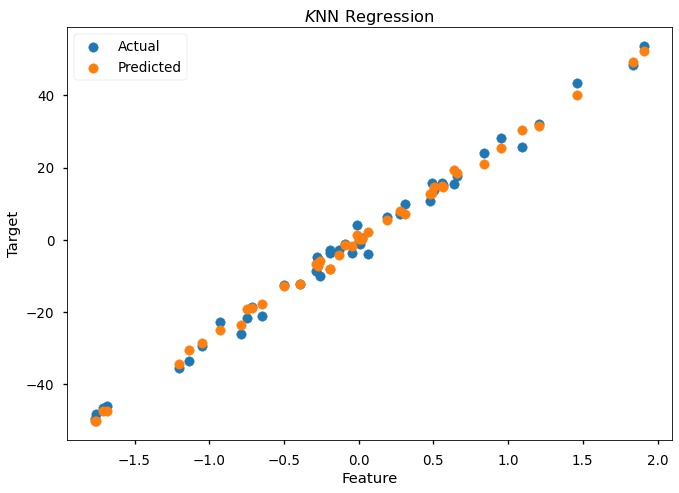

In [25]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Synthetic dataset
X, y = make_regression(n_samples=300, n_features=1, noise=2, random_state=7)
# X,y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

# training
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# predictions
y_pred = knn_regressor.predict(X_test)

# performance

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted')
plt.title('$K$NN Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
pass;